# **Imports**


In [ ]:
#Imports
import time
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# **Salary Stuff**

## **Combine QB DFS**

In [ ]:
def mergeQBConInfo():
  df0 = pd.read_csv("../content/RookieQBConLens2011.csv")
  df1 = pd.read_csv("../content/RookieQBConLens2012.csv")
  df2 = pd.read_csv("../content/RookieQBConLens2013.csv")
  df3 = pd.read_csv("../content/RookieQBConLens2014.csv")
  df4 = pd.read_csv("../content/RookieQBConLens2015.csv")
  df5 = pd.read_csv("../content/RookieQBConLens2016.csv")
  df6 = pd.read_csv("../content/RookieQBConLens2017.csv")
  df7 = pd.read_csv("../content/RookieQBConLens2018.csv")
  df8 = pd.read_csv("../content/RookieQBConLens2019.csv")
  df9 = pd.read_csv("../content/RookieQBConLens2020.csv")
  df10 = pd.read_csv("../content/RookieQBConLens2021.csv")
  df11 = pd.read_csv("../content/RookieQBConLens2022.csv")

  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCL = dfRCL.reset_index()
  dfRCL = dfRCL.drop(['index'], axis=1)
  dfRCL
  
  df0 = pd.read_csv("../content/RookieQBConSals2011.csv")
  df1 = pd.read_csv("../content/RookieQBConSals2012.csv")
  df2 = pd.read_csv("../content/RookieQBConSals2013.csv")
  df3 = pd.read_csv("../content/RookieQBConSals2014.csv")
  df4 = pd.read_csv("../content/RookieQBConSals2015.csv")
  df5 = pd.read_csv("../content/RookieQBConSals2016.csv")
  df6 = pd.read_csv("../content/RookieQBConSals2017.csv")
  df7 = pd.read_csv("../content/RookieQBConSals2018.csv")
  df8 = pd.read_csv("../content/RookieQBConSals2019.csv")
  df9 = pd.read_csv("../content/RookieQBConSals2020.csv")
  df10 = pd.read_csv("../content/RookieQBConSals2021.csv")
  df11= pd.read_csv("../content/RookieQBConSals2022.csv")

  dfRCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCS = dfRCS.reset_index()
  dfRCS = dfRCS.drop(['index'], axis=1)
  dfRCS

  dfRC = pd.merge(dfRCL, dfRCS,  how='left', left_on=['Year', 'Name', 'Rookie'], right_on = ['Year', 'Name', 'Rookie'])
  dfRC.insert(3, 'Vet', 0)

  df0 = pd.read_csv("../content/VetQBConLens2011.csv")
  df1 = pd.read_csv("../content/VetQBConLens2012.csv")
  df2 = pd.read_csv("../content/VetQBConLens2013.csv")
  df3 = pd.read_csv("../content/VetQBConLens2014.csv")
  df4 = pd.read_csv("../content/VetQBConLens2015.csv")
  df5 = pd.read_csv("../content/VetQBConLens2016.csv")
  df6 = pd.read_csv("../content/VetQBConLens2017.csv")
  df7 = pd.read_csv("../content/VetQBConLens2018.csv")
  df8 = pd.read_csv("../content/VetQBConLens2019.csv")
  df9 = pd.read_csv("../content/VetQBConLens2020.csv")
  df10 = pd.read_csv("../content/VetQBConLens2021.csv")
  df11 = pd.read_csv("../content/VetQBConLens2022.csv")

  dfVCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCL = dfVCL.reset_index()
  dfVCL = dfVCL.drop(['index'], axis=1)
  dfVCL

  df0 = pd.read_csv("../content/VetQBConSals2011.csv")
  df1 = pd.read_csv("../content/VetQBConSals2012.csv")
  df2 = pd.read_csv("../content/VetQBConSals2013.csv")
  df3 = pd.read_csv("../content/VetQBConSals2014.csv")
  df4 = pd.read_csv("../content/VetQBConSals2015.csv")
  df5 = pd.read_csv("../content/VetQBConSals2016.csv")
  df6 = pd.read_csv("../content/VetQBConSals2017.csv")
  df7 = pd.read_csv("../content/VetQBConSals2018.csv")
  df8 = pd.read_csv("../content/VetQBConSals2019.csv")
  df9 = pd.read_csv("../content/VetQBConSals2020.csv")
  df10 = pd.read_csv("../content/VetQBConSals2021.csv")
  df11 = pd.read_csv("../content/VetQBConSals2022.csv")

  dfVCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCS = dfVCS.reset_index()
  dfVCS = dfVCS.drop(['index'], axis=1)
  dfVCS


  dfVC = pd.merge(dfVCL, dfVCS,  how='left', left_on=['Year', 'Name', 'Vet'], right_on = ['Year', 'Name', 'Vet'])
  dfVC.insert(2, 'Rookie', 0)

  df = dfRC.append(dfVC)
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df['Con_Sal'] = df['Con_Sal'].str.replace(',', '').str.replace('$', '').astype(int)
  df['Con_Len'] = df['Con_Len'].str.strip(' years').astype(int)

  return df.to_csv('ConInfoQB.csv', index=False)

In [ ]:
mergeQBConInfo()

<ipython-input-13-5513835e3907>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-13-5513835e3907>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-13-5513835e3907>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-13-5513835e3907>:15: FutureWarning

## **Combine RB DFS**

In [ ]:
def mergeRBConInfo():
  df0 = pd.read_csv("../content/RookieRBConLens2011.csv")
  df1 = pd.read_csv("../content/RookieRBConLens2012.csv")
  df2 = pd.read_csv("../content/RookieRBConLens2013.csv")
  df3 = pd.read_csv("../content/RookieRBConLens2014.csv")
  df4 = pd.read_csv("../content/RookieRBConLens2015.csv")
  df5 = pd.read_csv("../content/RookieRBConLens2016.csv")
  df6 = pd.read_csv("../content/RookieRBConLens2017.csv")
  df7 = pd.read_csv("../content/RookieRBConLens2018.csv")
  df8 = pd.read_csv("../content/RookieRBConLens2019.csv")
  df9 = pd.read_csv("../content/RookieRBConLens2020.csv")
  df10 = pd.read_csv("../content/RookieRBConLens2021.csv")
  df11 = pd.read_csv("../content/RookieRBConLens2022.csv")

  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCL = dfRCL.reset_index()
  dfRCL = dfRCL.drop(['index'], axis=1)
  dfRCL

  df0 = pd.read_csv("../content/RookieRBConSals2011.csv")
  df1 = pd.read_csv("../content/RookieRBConSals2012.csv")
  df2 = pd.read_csv("../content/RookieRBConSals2013.csv")
  df3 = pd.read_csv("../content/RookieRBConSals2014.csv")
  df4 = pd.read_csv("../content/RookieRBConSals2015.csv")
  df5 = pd.read_csv("../content/RookieRBConSals2016.csv")
  df6 = pd.read_csv("../content/RookieRBConSals2017.csv")
  df7 = pd.read_csv("../content/RookieRBConSals2018.csv")
  df8 = pd.read_csv("../content/RookieRBConSals2019.csv")
  df9 = pd.read_csv("../content/RookieRBConSals2020.csv")
  df10 = pd.read_csv("../content/RookieRBConSals2021.csv")
  df11 = pd.read_csv("../content/RookieRBConSals2022.csv")

  dfRCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCS = dfRCS.reset_index()
  dfRCS = dfRCS.drop(['index'], axis=1)
  dfRCS

  dfRC = pd.merge(dfRCL, dfRCS,  how='left', left_on=['Year', 'Name', 'Rookie'], right_on = ['Year', 'Name', 'Rookie'])
  dfRC.insert(3, 'Vet', 0)

  df0 = pd.read_csv("../content/VetRBConLens2011.csv")
  df1 = pd.read_csv("../content/VetRBConLens2012.csv")
  df2 = pd.read_csv("../content/VetRBConLens2013.csv")
  df3 = pd.read_csv("../content/VetRBConLens2014.csv")
  df4 = pd.read_csv("../content/VetRBConLens2015.csv")
  df5 = pd.read_csv("../content/VetRBConLens2016.csv")
  df6 = pd.read_csv("../content/VetRBConLens2017.csv")
  df7 = pd.read_csv("../content/VetRBConLens2018.csv")
  df8 = pd.read_csv("../content/VetRBConLens2019.csv")
  df9 = pd.read_csv("../content/VetRBConLens2020.csv")
  df10 = pd.read_csv("../content/VetRBConLens2021.csv")
  df11 = pd.read_csv("../content/VetRBConLens2022.csv")

  dfVCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCL = dfVCL.reset_index()
  dfVCL = dfVCL.drop(['index'], axis=1)
  dfVCL
  
  df0 = pd.read_csv("../content/VetRBConSals2011.csv")
  df1 = pd.read_csv("../content/VetRBConSals2012.csv")
  df2 = pd.read_csv("../content/VetRBConSals2013.csv")
  df3 = pd.read_csv("../content/VetRBConSals2014.csv")
  df4 = pd.read_csv("../content/VetRBConSals2015.csv")
  df5 = pd.read_csv("../content/VetRBConSals2016.csv")
  df6 = pd.read_csv("../content/VetRBConSals2017.csv")
  df7 = pd.read_csv("../content/VetRBConSals2018.csv")
  df8 = pd.read_csv("../content/VetRBConSals2019.csv")
  df9 = pd.read_csv("../content/VetRBConSals2020.csv")
  df10 = pd.read_csv("../content/VetRBConSals2021.csv")
  df11 = pd.read_csv("../content/VetRBConSals2022.csv")

  dfVCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCS = dfVCS.reset_index()
  dfVCS = dfVCS.drop(['index'], axis=1)
  dfVCS


  dfVC = pd.merge(dfVCL, dfVCS,  how='left', left_on=['Year', 'Name', 'Vet'], right_on = ['Year', 'Name', 'Vet'])
  dfVC.insert(2, 'Rookie', 0)

  df = dfRC.append(dfVC)
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df['Con_Sal'] = df['Con_Sal'].str.replace(',', '').str.replace('$', '').astype(int)
  df['Con_Len'] = df['Con_Len'].str.strip(' years').astype(int)

  return df.to_csv('ConInfoRB.csv', index=False)

In [ ]:
mergeRBConInfo()

<ipython-input-17-68aa46ef98ec>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-17-68aa46ef98ec>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-17-68aa46ef98ec>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-17-68aa46ef98ec>:15: FutureWarning

## **Combine WR DFS**

In [ ]:
def mergeWRConInfo():
  df0 = pd.read_csv("../content/RookieWRConLens2011.csv")
  df1 = pd.read_csv("../content/RookieWRConLens2012.csv")
  df2 = pd.read_csv("../content/RookieWRConLens2013.csv")
  df3 = pd.read_csv("../content/RookieWRConLens2014.csv")
  df4 = pd.read_csv("../content/RookieWRConLens2015.csv")
  df5 = pd.read_csv("../content/RookieWRConLens2016.csv")
  df6 = pd.read_csv("../content/RookieWRConLens2017.csv")
  df7 = pd.read_csv("../content/RookieWRConLens2018.csv")
  df8 = pd.read_csv("../content/RookieWRConLens2019.csv")
  df9 = pd.read_csv("../content/RookieWRConLens2020.csv")
  df10 = pd.read_csv("../content/RookieWRConLens2021.csv")
  df11 = pd.read_csv("../content/RookieWRConLens2022.csv")

  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCL = dfRCL.reset_index()
  dfRCL = dfRCL.drop(['index'], axis=1)
  dfRCL

  df0 = pd.read_csv("../content/RookieWRConSals2011.csv")
  df1 = pd.read_csv("../content/RookieWRConSals2012.csv")
  df2 = pd.read_csv("../content/RookieWRConSals2013.csv")
  df3 = pd.read_csv("../content/RookieWRConSals2014.csv")
  df4 = pd.read_csv("../content/RookieWRConSals2015.csv")
  df5 = pd.read_csv("../content/RookieWRConSals2016.csv")
  df6 = pd.read_csv("../content/RookieWRConSals2017.csv")
  df7 = pd.read_csv("../content/RookieWRConSals2018.csv")
  df8 = pd.read_csv("../content/RookieWRConSals2019.csv")
  df9 = pd.read_csv("../content/RookieWRConSals2020.csv")
  df10 = pd.read_csv("../content/RookieWRConSals2021.csv")
  df11 = pd.read_csv("../content/RookieWRConSals2022.csv")

  dfRCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCS = dfRCS.reset_index()
  dfRCS = dfRCS.drop(['index'], axis=1)
  dfRCS

  dfRC = pd.merge(dfRCL, dfRCS,  how='left', left_on=['Year', 'Name', 'Rookie'], right_on = ['Year', 'Name', 'Rookie'])
  dfRC.insert(3, 'Vet', 0)

  df0 = pd.read_csv("../content/VetWRConLens2011.csv")
  df1 = pd.read_csv("../content/VetWRConLens2012.csv")
  df2 = pd.read_csv("../content/VetWRConLens2013.csv")
  df3 = pd.read_csv("../content/VetWRConLens2014.csv")
  df4 = pd.read_csv("../content/VetWRConLens2015.csv")
  df5 = pd.read_csv("../content/VetWRConLens2016.csv")
  df6 = pd.read_csv("../content/VetWRConLens2017.csv")
  df7 = pd.read_csv("../content/VetWRConLens2018.csv")
  df8 = pd.read_csv("../content/VetWRConLens2019.csv")
  df9 = pd.read_csv("../content/VetWRConLens2020.csv")
  df10 = pd.read_csv("../content/VetWRConLens2021.csv")
  df11 = pd.read_csv("../content/VetWRConLens2022.csv")

  dfVCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCL = dfVCL.reset_index()
  dfVCL = dfVCL.drop(['index'], axis=1)
  dfVCL
  
  df0 = pd.read_csv("../content/VetWRConSals2011.csv")
  df1 = pd.read_csv("../content/VetWRConSals2012.csv")
  df2 = pd.read_csv("../content/VetWRConSals2013.csv")
  df3 = pd.read_csv("../content/VetWRConSals2014.csv")
  df4 = pd.read_csv("../content/VetWRConSals2015.csv")
  df5 = pd.read_csv("../content/VetWRConSals2016.csv")
  df6 = pd.read_csv("../content/VetWRConSals2017.csv")
  df7 = pd.read_csv("../content/VetWRConSals2018.csv")
  df8 = pd.read_csv("../content/VetWRConSals2019.csv")
  df9 = pd.read_csv("../content/VetWRConSals2020.csv")
  df10 = pd.read_csv("../content/VetWRConSals2021.csv")
  df11 = pd.read_csv("../content/VetWRConSals2022.csv")

  dfVCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCS = dfVCS.reset_index()
  dfVCS = dfVCS.drop(['index'], axis=1)
  dfVCS


  dfVC = pd.merge(dfVCL, dfVCS,  how='left', left_on=['Year', 'Name', 'Vet'], right_on = ['Year', 'Name', 'Vet'])
  dfVC.insert(2, 'Rookie', 0)

  df = dfRC.append(dfVC)
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df['Con_Sal'] = df['Con_Sal'].str.replace(',', '').str.replace('$', '').astype(int)
  df['Con_Len'] = df['Con_Len'].str.strip(' years').astype(int)

  return df.to_csv('ConInfoWR.csv', index=False)

In [ ]:
mergeWRConInfo()

<ipython-input-19-0d853348138a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-19-0d853348138a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-19-0d853348138a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-19-0d853348138a>:15: FutureWarning

## **Combine TE DFS**

In [ ]:
def mergeTEConInfo():
  df0 = pd.read_csv("../content/RookieTEConLens2011.csv")
  df1 = pd.read_csv("../content/RookieTEConLens2012.csv")
  df2 = pd.read_csv("../content/RookieTEConLens2013.csv")
  df3 = pd.read_csv("../content/RookieTEConLens2014.csv")
  df4 = pd.read_csv("../content/RookieTEConLens2015.csv")
  df5 = pd.read_csv("../content/RookieTEConLens2016.csv")
  df6 = pd.read_csv("../content/RookieTEConLens2017.csv")
  df7 = pd.read_csv("../content/RookieTEConLens2018.csv")
  df8 = pd.read_csv("../content/RookieTEConLens2019.csv")
  df9 = pd.read_csv("../content/RookieTEConLens2020.csv")
  df10 = pd.read_csv("../content/RookieTEConLens2021.csv")
  df11 = pd.read_csv("../content/RookieTEConLens2022.csv")

  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCL = dfRCL.reset_index()
  dfRCL = dfRCL.drop(['index'], axis=1)
  dfRCL
  
  df0 = pd.read_csv("../content/RookieTEConSals2011.csv")
  df1 = pd.read_csv("../content/RookieTEConSals2012.csv")
  df2 = pd.read_csv("../content/RookieTEConSals2013.csv")
  df3 = pd.read_csv("../content/RookieTEConSals2014.csv")
  df4 = pd.read_csv("../content/RookieTEConSals2015.csv")
  df5 = pd.read_csv("../content/RookieTEConSals2016.csv")
  df6 = pd.read_csv("../content/RookieTEConSals2017.csv")
  df7 = pd.read_csv("../content/RookieTEConSals2018.csv")
  df8 = pd.read_csv("../content/RookieTEConSals2019.csv")
  df9 = pd.read_csv("../content/RookieTEConSals2020.csv")
  df10 = pd.read_csv("../content/RookieTEConSals2021.csv")
  df11 = pd.read_csv("../content/RookieTEConSals2022.csv")

  dfRCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfRCS = dfRCS.reset_index()
  dfRCS = dfRCS.drop(['index'], axis=1)
  dfRCS

  dfRC = pd.merge(dfRCL, dfRCS,  how='left', left_on=['Year', 'Name', 'Rookie'], right_on = ['Year', 'Name', 'Rookie'])
  dfRC.insert(3, 'Vet', 0)
  
  df0 = pd.read_csv("../content/VetTEConLens2011.csv")
  df1 = pd.read_csv("../content/VetTEConLens2012.csv")
  df2 = pd.read_csv("../content/VetTEConLens2013.csv")
  df3 = pd.read_csv("../content/VetTEConLens2014.csv")
  df4 = pd.read_csv("../content/VetTEConLens2015.csv")
  df5 = pd.read_csv("../content/VetTEConLens2016.csv")
  df6 = pd.read_csv("../content/VetTEConLens2017.csv")
  df7 = pd.read_csv("../content/VetTEConLens2018.csv")
  df8 = pd.read_csv("../content/VetTEConLens2019.csv")
  df9 = pd.read_csv("../content/VetTEConLens2020.csv")
  df10 = pd.read_csv("../content/VetTEConLens2021.csv")
  df11 = pd.read_csv("../content/VetTEConLens2022.csv")

  dfVCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCL = dfVCL.reset_index()
  dfVCL = dfVCL.drop(['index'], axis=1)
  dfVCL

  df0 = pd.read_csv("../content/VetTEConSals2011.csv")
  df1 = pd.read_csv("../content/VetTEConSals2012.csv")
  df2 = pd.read_csv("../content/VetTEConSals2013.csv")
  df3 = pd.read_csv("../content/VetTEConSals2014.csv")
  df4 = pd.read_csv("../content/VetTEConSals2015.csv")
  df5 = pd.read_csv("../content/VetTEConSals2016.csv")
  df6 = pd.read_csv("../content/VetTEConSals2017.csv")
  df7 = pd.read_csv("../content/VetTEConSals2018.csv")
  df8 = pd.read_csv("../content/VetTEConSals2019.csv")
  df9 = pd.read_csv("../content/VetTEConSals2020.csv")
  df10 = pd.read_csv("../content/VetTEConSals2021.csv")
  df11 = pd.read_csv("../content/VetTEConSals2022.csv")

  dfVCS = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)

  dfVCS = dfVCS.reset_index()
  dfVCS = dfVCS.drop(['index'], axis=1)
  dfVCS


  dfVC = pd.merge(dfVCL, dfVCS,  how='left', left_on=['Year', 'Name', 'Vet'], right_on = ['Year', 'Name', 'Vet'])
  dfVC.insert(2, 'Rookie', 0)

  df = dfRC.append(dfVC)
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df['Con_Sal'] = df['Con_Sal'].str.replace(',', '').str.replace('$', '').astype(int)
  df['Con_Len'] = df['Con_Len'].str.strip(' years').astype(int)

  return df.to_csv('ConInfoTE.csv', index=False)

In [ ]:
mergeTEConInfo()

<ipython-input-21-b425d9d37bef>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-21-b425d9d37bef>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-21-b425d9d37bef>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfRCL = df0.append(df1).append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(df9).append(df10).append(df11)
<ipython-input-21-b425d9d37bef>:15: FutureWarning

# **Fetch Data**

In [ ]:
df = pd.read_html('https://overthecap.com/contract-history/tight-end')[0]
df.to_csv('ContractInfoTE.csv')
final = pd.read_csv('/content/finalTE.csv')
con = pd.read_csv('/content/ContractInfoTE.csv')

In [ ]:
for i in con[con.Player == 'Matt Stafford'].index:
  con.at[i, 'Player'] = 'Matthew Stafford'

In [ ]:
final[final.Player == 'Dallas Goedert']

,Player,Tm,Pos,Rk,Age,G,GS,Cmp,Att,Cmp%,...,Fmb_R,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap


In [ ]:
con = con.drop(['Unnamed: 4', 'Unnamed: 8', 'Unnamed: 10'], axis=1)
con = con[['Player', 'Year Signed', 'Years', 'Value']]
con['Value'] = con['Value'].map(lambda x: x.lstrip('$'))
con['Value'] = con['Value'].map(lambda x: x.replace(',', ''))

In [ ]:
unique_players = set(final['Player'].tolist())
for player in unique_players:
  temp = con[con.Player == player].index
  for i in range(len(temp)):
    if con.loc[temp[i], 'Year Signed'] < 2011:
      con = con.drop(temp[i], axis=0)
con = con[con['Player'].isin(unique_players)]
con = con.sort_values(by='Year Signed', ascending=True, ignore_index=True)

In [ ]:
final['Con_Yrs_Lft'] = 0
final['New_Con_Len'] = 0
final['New_Perc_Cap'] = 0
for player in unique_players:
  cindex = con[con.Player == player].index
  findex = final[final.Player == player].index
  cPlayer = con[con.Player == player].rename(columns={"Year Signed": "YearSigned"})
  for i in range(len(findex)):
    if final.loc[findex[i], 'Year'] in cPlayer['YearSigned'].values:
      conend = final.loc[findex[i], 'Year'] + final.loc[findex[i], 'Con_Len']
      final.at[findex[i], 'Con_Yrs_Lft'] = final.loc[findex[i], 'Con_Len'] - 1
      if i != 0:
        final.at[findex[i-1], 'New_Con_Len'] = final.at[findex[i], 'Con_Len']
    elif final.loc[findex[i], 'Year'] == conend:
      final.at[findex[i], 'Con_Yrs_Lft'] = 0
      conend = final.loc[findex[i], 'Year']
    elif i == 0:
      inYear = cPlayer[cPlayer.YearSigned < final.loc[findex[i], 'Year']]['YearSigned'].tolist()
      if inYear:
        inYear = inYear[-1]
        final.at[findex[i], 'Con_Yrs_Lft'] = final.loc[findex[i], 'Con_Len'] - (final.loc[findex[i], 'Year'] - inYear) - 1
        conend = inYear + final.loc[findex[i], 'Con_Len'] - 1
        final.at[findex[i], 'New_Con_Len'] = 0
    else:
      final.at[findex[i], 'Con_Yrs_Lft'] = final.loc[findex[i-1], 'Con_Yrs_Lft'] - 1
      final.at[findex[i], 'New_Con_Len'] = 0
      conend = 0

In [ ]:
for player in unique_players:
  findex = final[final.Player == player].index
  for i in range(len(findex)):
   if i+1 in range(len(findex)):
     final.at[findex[i], 'New_Perc_Cap'] = final.loc[findex[i+1], '%Cap']

In [ ]:
#final = pd.read_csv('../content/finalQB.csv')
unique_players = set(final['Player'].tolist())
for player in unique_players:
  findex = final[final.Player == player].index
  for i in range(len(findex)):
   if final.loc[findex[i], 'Con_Yrs_Lft'] < 0:
     final.at[findex[i], 'Con_Yrs_Lft'] = 0

In [ ]:
final[final.Player == 'Dallas Goedert'].head(12)

,Player,Tm,Pos,Rk,Age,G,GS,Tgt,Rec,Ctch%,...,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap,Con_Yrs_Lft
630,Dallas Goedert,PHI,TE,-0.927548,-1.060746,0.769417,0.288973,0.386255,0.521051,0.438078,...,2018,1.0,0.0,4.0,5624271.0,177200000.0,0.007935,0,0.007471,3
715,Dallas Goedert,PHI,TE,-1.367293,-0.740724,0.670802,0.439283,1.667809,1.551522,0.032770,...,2019,1.0,0.0,4.0,5624271.0,188200000.0,0.007471,0,0.007094,2
815,Dallas Goedert,PHI,TE,-1.067821,-0.599277,-0.544812,0.384133,0.911479,1.003812,0.294808,...,2020,1.0,0.0,4.0,5624271.0,198200000.0,0.007094,4,0.078082,1
910,Dallas Goedert,PHI,TE,-1.338148,-0.244729,0.379943,1.315898,1.179237,1.343916,0.254603,...,2021,0.0,1.0,4.0,57000000.0,182500000.0,0.078082,0,0.068444,3
1002,Dallas Goedert,PHI,TE,-1.219155,0.243941,-0.548741,0.805544,1.027544,1.363097,0.610674,...,2022,0.0,1.0,4.0,57000000.0,208200000.0,0.068444,0,0.000000,2


In [ ]:
final.to_csv('finalTE.csv')

### QB DataFrame

In [ ]:
def cleanQBPassingData(df):
  QBdf = df
  QBdf = QBdf[QBdf.Age != 'Age']
  QBdf = QBdf[QBdf.Pos == 'QB']
  QBdf['Player'] = QBdf['Player'].map(lambda x: x.rstrip('*+ '))
  QBdf['QBrec'] = QBdf['QBrec'].fillna('0-0-0')
  QBdf['Win'] = QBdf['QBrec'].str.split('-').str[0]
  QBdf['Loss'] = QBdf['QBrec'].str.split('-').str[1]
  QBdf = QBdf.drop('QBrec', axis=1)
  QBdf = QBdf.fillna('0')
  QBdf = QBdf.astype({'Rk': 'int', 'Player': 'object', 'Tm': 'object', 'Age': 'int', 'Pos': 'object', 'G': 'int', 'GS': 'int', 'Win': 'int', 'Loss': 'int',
                  'Cmp': 'int', 'Att': 'int', 'Cmp%': 'float', 'Yds': 'int', 'TD': 'int', 'TD%': 'float', 'Int': 'int', 'Int%': 'float', '1D': 'int', 'Lng': 'int', 'Y/A': 'float', 'AY/A': 'float',
                  'Y/C': 'float', 'Y/G': 'float', 'Rate': 'float', 'QBR': 'float', 'Sk': 'int', 'Yds.1': 'int', 'Sk%': 'float', 'NY/A': 'float', 'ANY/A': 'float', '4QC': 'int', 'GWD': 'int'})
  QBdf = QBdf[QBdf.GS >= 1]
  ptp = QBdf[['Player', 'Tm', 'Pos']]
  QBdf = QBdf.select_dtypes(include='number').apply(zscore)
  QBdf = pd.concat([ptp, QBdf], axis=1, join='inner')
  return QBdf 

def cleanQBRushingData(df):
  rushDF = df
  rushDF.columns = rushDF.columns.get_level_values(1)
  rushDF = rushDF[rushDF.Age != 'Age']
  rushDF = rushDF[rushDF.Pos == 'QB']
  rushDF['Player'] = rushDF['Player'].map(lambda x: x.rstrip('*+ '))
  rushDF = rushDF.drop(['Rk', 'Age', 'Pos', 'G', 'GS'], axis=1)
  rushDF = rushDF.astype({'Player': 'object', 'Tm': 'object', 'Att': 'int', 'Yds': 'int', 'TD': 'int',
                      '1D': 'int', 'Lng': 'int', 'Y/A': 'float', 'Y/G': 'float', 'Fmb': 'int'})
  rushDF = rushDF.rename(columns={'Att': 'Att_R', 'Yds': 'Yds_R', 'TD': 'TD_R', '1D': '1D_R', 'Lng': 'Lng_R', 'Y/A': 'Y/A_R', 'Y/G': 'Y/G_R', 'Fmb': 'Fmb_R'})
  pt = rushDF[['Player', 'Tm']] 
  rushDF = rushDF.select_dtypes(include='number').apply(zscore)
  rushDF = pd.concat([pt, rushDF], axis=1, join='inner')
  return rushDF


#Scrape data
def scrapeQBData(kind, frm, to):
  for year in range(frm, to):
    time.sleep(2)
    url_head = 'https://www.pro-football-reference.com/years/'
    yr = str(year)
    url_tail = '.htm'
    url = url_head + yr + '/' + kind + url_tail
    df = pd.read_html(url)[0]
    if kind == 'passing':
      cleandf = cleanQBPassingData(df)
    else:
      cleandf = cleanQBRushingData(df)
    cleandf.to_csv('QB'+kind+yr+'.csv', index=False)
  return
scrapeQBData('passing', 2010, 2023)
scrapeQBData('rushing', 2010, 2023)

In [ ]:
#Read in data
def getContractData(pos):
  DFfile = '../content/ConInfo' + pos + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
#Read in data
def getStatDataQB(kind, year):
  DFfile = 'QB' + kind + str(year) + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
def QBbyYear(year):
  QBdf = getStatDataQB('passing', year)
  rushDF = getStatDataQB('rushing', year)
  df = QBdf.merge(rushDF, how='left', left_on=['Player', 'Tm'], right_on=['Player', 'Tm'])
  df['Year'] = int(year)
  return df
    
def mergeStatsContractQB(year):
  stats = QBbyYear(year)
  contract = getContractData('QB')
  contract = contract.rename(columns={"Name": "Player"})
  df = stats.merge(contract, how='left', left_on=['Player', 'Year'], right_on=['Player', 'Year'])
  return df

def fullDataFrameQB(start, end):
  df = mergeStatsContractQB(start)
  for year in range(start+1, end):
    df = df.append(mergeStatsContractQB(year))
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df.to_csv('fullDataFrameQB.csv', index=False)
  return df

In [ ]:
def addSalaryCap(df):
  full = df
  cap = pd.read_csv('/content/SalaryCapByYear.csv')
  cap['Cap'] = cap['Cap'].apply(lambda x: x*1000000)
  df = full.merge(cap, how='left', left_on=['Year'], right_on=['Year'])
  return df

In [ ]:
def addPercentCap(df):
  ppy = df['Con_Sal']/df['Con_Len']
  df['%Cap'] = ppy/df['Cap']
  return df

In [ ]:
def finalDataFrameQB(start, end):
  df = fullDataFrameQB(start, end)
  df = addSalaryCap(df)
  df = addPercentCap(df)
  unique_players = set(df['Player'].tolist())
  df['New_Con_Len'] = 0
  df['New_Perc_Cap'] = 0
  for player in unique_players:
    temp = df[df.Player == player].index
    for i in range(len(temp)):
      if i == 0:
        df.at[temp[i], 'New_Con_Len'] = 0
        df.at[temp[i], 'New_Perc_Cap'] = 0
      else: 
        df.at[temp[i], 'New_Con_Len'] = df.at[temp[i], 'Con_Len'] - df.at[temp[i-1], 'Con_Len']
        df.at[temp[i], 'New_Perc_Cap'] = df.at[temp[i], '%Cap'] - df.at[temp[i-1], '%Cap']
  df.to_csv('finalQB.csv', index=False)
  return df

In [ ]:
df = finalDataFrameQB(2010, 2023)

<ipython-input-5-7c113bec1aa7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractQB(year))
<ipython-input-5-7c113bec1aa7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractQB(year))
<ipython-input-5-7c113bec1aa7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractQB(year))
<ipython-input-5-7c113bec1aa7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractQB(year))
<ipython-input-5-7c113bec1aa7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [ ]:
df[df.Player == "Aaron Rodgers"]

,Player,Tm,Pos,Rk,Age,G,GS,Cmp,Att,Cmp%,...,Fmb_R,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap
4,Aaron Rodgers,GNB,QB,-1.420670,-0.070913,0.984443,1.034111,1.237907,0.976285,1.667205,...,0.014208,2011,0.0,1.0,6.0,63520000.0,120375000.0,0.087947,0,0.000000
61,Aaron Rodgers,GNB,QB,-1.157332,0.313676,0.858266,0.895010,1.121449,0.885460,1.171793,...,0.202647,2012,0.0,1.0,6.0,63520000.0,120600000.0,0.087783,0,-0.000164
124,Aaron Rodgers,GNB,QB,-0.055066,0.488466,-0.386491,-0.214066,-0.193465,-0.336145,1.186750,...,-0.018821,2013,0.0,1.0,5.0,110000000.0,123600000.0,0.177994,-1,0.090210
153,Aaron Rodgers,GNB,QB,-1.304536,0.609675,1.106606,1.129831,1.008030,0.938224,0.908868,...,1.673127,2014,0.0,1.0,5.0,110000000.0,133000000.0,0.165414,0,-0.012580
215,Aaron Rodgers,GNB,QB,-0.653095,0.606181,1.132910,1.127531,1.022924,1.162203,-0.351572,...,1.161834,2015,0.0,1.0,5.0,110000000.0,143280000.0,0.153546,0,-0.011868
253,Aaron Rodgers,GNB,QB,-1.482276,0.955994,1.054302,1.060684,1.284582,1.212349,0.725808,...,1.027171,2016,0.0,1.0,5.0,110000000.0,155270000.0,0.141689,0,-0.011857
334,Aaron Rodgers,GNB,QB,0.204873,1.096103,-0.537615,-0.357422,-0.298769,-0.360486,0.585800,...,-0.737506,2017,0.0,1.0,5.0,110000000.0,167000000.0,0.131737,0,-0.009952
362,Aaron Rodgers,GNB,QB,-1.373267,1.234220,1.057173,1.154631,1.175114,1.343850,-0.112059,...,0.469726,2018,0.0,1.0,4.0,134000000.0,177200000.0,0.189052,-1,0.057315
420,Aaron Rodgers,GNB,QB,-1.037947,1.395958,1.142869,1.189770,1.148430,1.232072,-0.026582,...,-0.142481,2019,0.0,1.0,4.0,134000000.0,188200000.0,0.178002,0,-0.011050
470,Aaron Rodgers,GNB,QB,-1.279964,1.541672,1.159373,1.193740,1.236463,1.066378,1.371946,...,0.233991,2020,0.0,1.0,4.0,134000000.0,198200000.0,0.169021,0,-0.008981


### RB DataFrame

In [ ]:
def cleanRBRushingData(df):
  RBdf = df
  RBdf.columns = RBdf.columns.get_level_values(1)
  RBdf = RBdf[RBdf.Age != 'Age']
  RBdf = RBdf[RBdf.Pos == 'RB']
  RBdf['Player'] = RBdf['Player'].map(lambda x: x.rstrip('*+ '))
  RBdf = RBdf.fillna('0')
  RBdf = RBdf.astype({'Rk': 'int', 'Player': 'object', 'Tm': 'object', 'Age': 'int', 'Pos': 'object',
                      'G': 'int', 'GS': 'int', 'Att': 'int', 'Yds': 'int', 'TD': 'int', '1D': 'int', 
                      'Lng': 'int', 'Y/A': 'float', 'Y/G': 'float', 'Fmb': 'int'})
  RBdf = RBdf[RBdf.GS >= 1]
  ptp = RBdf[['Player', 'Tm', 'Pos']] 
  RBdf = RBdf.select_dtypes(include='number').apply(zscore)
  RBdf = pd.concat([ptp, RBdf], axis=1, join='inner')
  return RBdf

def cleanRBReceivingData(df):
  RBdf = df
  RBdf = RBdf[RBdf.Age != 'Age']
  RBdf = RBdf[RBdf.Pos == 'RB']
  RBdf['Player'] = RBdf['Player'].map(lambda x: x.rstrip('*+ '))
  RBdf['Ctch%'] = RBdf['Ctch%'].map(lambda x: x.rstrip("% "))
  RBdf = RBdf.fillna('0')
  RBdf = RBdf.astype({'Rk': 'int', 'Player': 'object', 'Tm': 'object', 'Age': 'int', 'Pos': 'object',
                      'G': 'int', 'GS': 'int', 'Tgt': 'int', 'Rec': 'int', 'Ctch%': 'float', 'Yds': 'int', 
                      'Y/R': 'float', 'TD': 'float', '1D': 'int', 'Lng': 'int',
                      'Y/Tgt': 'float', 'R/G': 'float', 'Fmb': 'int'})
  RBdf = RBdf[RBdf.GS >= 1]
  ptp = RBdf[['Player', 'Tm', 'Pos']] 
  RBdf = RBdf.select_dtypes(include='number').apply(zscore)
  RBdf = pd.concat([ptp, RBdf], axis=1, join='inner')
  return RBdf

#Scrape data
def scrapeRBData(kind, frm, to):
  for year in range(frm, to):
    time.sleep(2)
    url_head = 'https://www.pro-football-reference.com/years/'
    yr = str(year)
    url_tail = '.htm'
    url = url_head + yr + '/' + kind + url_tail
    df = pd.read_html(url)[0]
    if kind == 'rushing':
      cleandf = cleanRBRushingData(df)
    else:
      cleandf = cleanRBReceivingData(df)
    cleandf.to_csv('RB'+kind+yr+'.csv', index=False)
  return
scrapeRBData('rushing', 2010, 2023)
scrapeRBData('receiving', 2010, 2023)

In [ ]:
#Read in data
def getContractData(pos):
  DFfile = '../content/ConInfo' + pos + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
#Read in data
def getStatDataRB(kind, year):
  DFfile = 'RB' + kind + str(year) + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
def RBbyYear(year):
  RBdf = getStatDataRB('rushing', year)
  RBdf = RBdf.rename(columns = {'Rk': 'Rush_Rk', 'Yds': 'Rush_Yds', 'TD': 'Rush_TD', '1D': 'Rush_1D', 'Lng': 'Rush_Lng', 'Fmb': 'Rush_Fmb'})
  receivingDF = getStatDataRB('receiving', year)
  receivingDF = receivingDF.drop(['Pos', 'Age', 'G', 'GS'], axis=1)
  receivingDF = receivingDF.rename(columns = {'Rk': 'Rec_Rk', 'Yds': 'Rec_Yds', 'TD': 'Rec_TD', '1D': 'Rec_1D', 'Lng': 'Rec_Lng', 'Fmb': 'Rec_Fmb'})
  df = RBdf.merge(receivingDF, how='left', left_on=['Player', 'Tm'], right_on=['Player', 'Tm'])
  df['Year'] = int(year)
  return df
    
def mergeStatsContractRB(year):
  stats = RBbyYear(year)
  contract = getContractData('RB')
  contract = contract.rename(columns={"Name": "Player"})
  df = stats.merge(contract, how='left', left_on=['Player', 'Year'], right_on=['Player', 'Year'])
  return df

def fullDataFrameRB(start, end):
  df = mergeStatsContractRB(start)
  for year in range(start+1, end):
    df = df.append(mergeStatsContractRB(year))
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df.to_csv('fullDataFrameRB.csv', index=False)
  return df

In [ ]:
def addSalaryCap(df):
  full = df
  cap = pd.read_csv('../content/SalaryCapByYear.csv')
  cap['Cap'] = cap['Cap'].apply(lambda x: x*1000000)
  df = full.merge(cap, how='left', left_on=['Year'], right_on=['Year'])
  return df

In [ ]:
def addPercentCap(df):
  ppy = df['Con_Sal']/df['Con_Len']
  df['%Cap'] = ppy/df['Cap']
  return df

In [ ]:
def finalDataFrameRB(start, end):
  df = fullDataFrameRB(start, end)
  df = addSalaryCap(df)
  df = addPercentCap(df)
  unique_players = set(df['Player'].tolist())
  df['New_Con_Len'] = 0
  df['New_Perc_Cap'] = 0
  for player in unique_players:
    temp = df[df.Player == player].index
    for i in range(len(temp)):
      if i == 0:
        df.at[temp[i], 'New_Con_Len'] = 0
        df.at[temp[i], 'New_Perc_Cap'] = 0
      else: 
        df.at[temp[i], 'New_Con_Len'] = df.at[temp[i], 'Con_Len'] - df.at[temp[i-1], 'Con_Len']
        df.at[temp[i], 'New_Perc_Cap'] = df.at[temp[i], '%Cap'] - df.at[temp[i-1], '%Cap']
  df.to_csv('finalRB.csv', index=False)
  return df

In [ ]:
df = finalDataFrameRB(2010, 2023)

<ipython-input-133-c659ffad2641>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractRB(year))
<ipython-input-133-c659ffad2641>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractRB(year))
<ipython-input-133-c659ffad2641>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractRB(year))
<ipython-input-133-c659ffad2641>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractRB(year))
<ipython-input-133-c659ffad2641>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [ ]:
df[df.Player == "Miles Sanders"]

,Player,Tm,Pos,Rush_Rk,Age,G,GS,Att,Rush_Yds,Rush_TD,...,Rec_Fmb,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap
613,Miles Sanders,PHI,RB,-0.650773,-1.106479,0.785490,0.783435,0.648568,0.735506,-0.215842,...,0.481284,2019,1.0,0.0,4.0,5350175.0,188200000.0,0.007107,0,0.000000
684,Miles Sanders,PHI,RB,-0.692010,-0.779643,-0.096090,0.929862,0.616604,0.932939,0.447810,...,2.296572,2020,1.0,0.0,4.0,5350175.0,198200000.0,0.006748,0,-0.000359
772,Miles Sanders,PHI,RB,-0.375340,-0.654055,-0.349136,1.028397,0.166784,0.642291,-1.106273,...,-0.210336,2021,1.0,0.0,4.0,5350175.0,182500000.0,0.007329,0,0.000581
821,Miles Sanders,PHI,RB,-0.844594,-0.132450,0.945659,1.403343,1.404399,1.628527,1.834072,...,0.320145,2022,1.0,0.0,4.0,5350175.0,208200000.0,0.006424,0,-0.000905


### WR DataFrame

In [ ]:
def cleanWRReceivingData(df):
  WRdf = df
  WRdf = WRdf[WRdf.Age != 'Age']
  WRdf = WRdf[WRdf.Pos == 'WR']
  WRdf['Player'] = WRdf['Player'].map(lambda x: x.rstrip('*+ '))
  WRdf['Ctch%'] = WRdf['Ctch%'].map(lambda x: x.rstrip("% "))
  WRdf = WRdf.fillna('0')
  WRdf = WRdf.astype({'Rk': 'int', 'Player': 'object', 'Tm': 'object', 'Age': 'int', 'Pos': 'object',
                      'G': 'int', 'GS': 'int', 'Tgt': 'int', 'Rec': 'int', 'Ctch%': 'float', 'Yds': 'int', 
                      'Y/R': 'float', 'TD': 'float', '1D': 'int', 'Lng': 'int',
                      'Y/Tgt': 'float', 'R/G': 'float', 'Fmb': 'int'})
  WRdf = WRdf[WRdf.GS >= 1]
  ptp = WRdf[['Player', 'Tm', 'Pos']] 
  WRdf = WRdf.select_dtypes(include='number').apply(zscore)
  WRdf = pd.concat([ptp, WRdf], axis=1, join='inner')
  return WRdf 

#Scrape data
def scrapeWRData(kind, frm, to):
  for year in range(frm, to):
    time.sleep(2)
    url_head = 'https://www.pro-football-reference.com/years/'
    yr = str(year)
    url_tail = '.htm'
    url = url_head + yr + '/' + kind + url_tail
    df = pd.read_html(url)[0]  
    cleandf = cleanWRReceivingData(df)
    cleandf.to_csv('WR'+kind+yr+'.csv', index=False)
  return
scrapeWRData('receiving', 2010, 2023)

In [ ]:
#Read in data
def getContractData(pos):
  DFfile = '../content/ConInfo' + pos + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
#Read in data
def getStatDataWR(kind, year):
  DFfile = 'WR' + kind + str(year) + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
def WRbyYear(year):
  df = getStatDataWR('receiving', year)
  df['Year'] = int(year)
  return df
    
def mergeStatsContractWR(year):
  stats = WRbyYear(year)
  contract = getContractData('WR')
  contract = contract.rename(columns={"Name": "Player"})
  df = stats.merge(contract, how='left', left_on=['Player', 'Year'], right_on=['Player', 'Year'])
  return df

def fullDataFrameWR(start, end):
  df = mergeStatsContractWR(start)
  for year in range(start+1, end):
    df = df.append(mergeStatsContractWR(year))
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df.to_csv('fullDataFrameWR.csv', index=False)
  return df

In [ ]:
def addSalaryCap(df):
  full = df
  cap = pd.read_csv('../content/SalaryCapByYear.csv')
  cap['Cap'] = cap['Cap'].apply(lambda x: x*1000000)
  df = full.merge(cap, how='left', left_on=['Year'], right_on=['Year'])
  return df

In [ ]:
def addPercentCap(df):
  ppy = df['Con_Sal']/df['Con_Len']
  df['%Cap'] = ppy/df['Cap']
  return df

In [ ]:
def finalDataFrameWR(start, end):
  df = fullDataFrameWR(start, end)
  df = addSalaryCap(df)
  df = addPercentCap(df)
  unique_players = set(df['Player'].tolist())
  df['New_Con_Len'] = 0
  df['New_Perc_Cap'] = 0
  for player in unique_players:
    temp = df[df.Player == player].index
    for i in range(len(temp)):
      if i == 0:
        df.at[temp[i], 'New_Con_Len'] = 0
        df.at[temp[i], 'New_Perc_Cap'] = 0
      else: 
        df.at[temp[i], 'New_Con_Len'] = df.at[temp[i], 'Con_Len'] - df.at[temp[i-1], 'Con_Len']
        df.at[temp[i], 'New_Perc_Cap'] = df.at[temp[i], '%Cap'] - df.at[temp[i-1], '%Cap']
  df.to_csv('finalWR.csv', index=False)
  return df

In [ ]:
df = finalDataFrameWR(2010, 2023)

<ipython-input-145-b12872aea195>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractWR(year))
<ipython-input-145-b12872aea195>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractWR(year))
<ipython-input-145-b12872aea195>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractWR(year))
<ipython-input-145-b12872aea195>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractWR(year))
<ipython-input-145-b12872aea195>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [ ]:
df[df.Player == "DeAndre Hopkins"]

,Player,Tm,Pos,Rk,Age,G,GS,Tgt,Rec,Ctch%,...,Fmb,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap
277,DeAndre Hopkins,HOU,WR,-0.704859,-1.611215,0.791105,1.533763,0.452540,0.399989,0.023045,...,0.265864,2013,1.0,0.0,4.0,7626702.0,123600000.0,0.015426,0,0.000000
379,DeAndre Hopkins,HOU,WR,-1.000079,-1.305645,0.684366,1.332735,1.210250,1.129044,0.076443,...,0.960951,2014,1.0,0.0,4.0,7626702.0,133000000.0,0.014336,0,-0.001090
478,DeAndre Hopkins,HOU,WR,-1.317143,-0.945154,0.833529,1.596051,2.761807,2.435031,-0.044078,...,0.277371,2015,1.0,0.0,4.0,7626702.0,143280000.0,0.013307,0,-0.001029
605,DeAndre Hopkins,HOU,WR,-1.133570,-0.603366,0.768990,1.557602,1.936811,1.383720,-0.626697,...,-0.652807,2016,1.0,0.0,4.0,7626702.0,155270000.0,0.012280,0,-0.001028
742,DeAndre Hopkins,HOU,WR,-1.305791,-0.269053,0.600281,1.472564,2.763496,2.313156,-0.089986,...,0.347179,2017,0.0,1.0,5.0,81000000.0,167000000.0,0.097006,1,0.084726
884,DeAndre Hopkins,HOU,WR,-1.372270,-0.027439,0.905286,1.738193,2.504940,2.772409,0.568235,...,1.281214,2018,0.0,1.0,5.0,81000000.0,177200000.0,0.091422,0,-0.005584
1037,DeAndre Hopkins,HOU,WR,-1.414661,0.443252,0.657883,1.646596,2.266283,2.521764,0.670423,...,-0.575212,2019,0.0,1.0,5.0,81000000.0,188200000.0,0.086079,0,-0.005343
1194,DeAndre Hopkins,ARI,WR,-1.312613,0.824073,0.894904,1.769909,2.446107,2.679214,0.568095,...,2.513159,2020,0.0,1.0,2.0,54500000.0,198200000.0,0.137487,-3,0.051409
1398,DeAndre Hopkins,ARI,WR,-0.594248,1.102621,-0.682899,0.535300,0.121346,0.159410,0.356672,...,-0.606810,2021,0.0,1.0,2.0,54500000.0,182500000.0,0.149315,0,0.011828
1526,DeAndre Hopkins,ARI,WR,-0.955711,1.419647,-1.140482,0.217147,0.805065,0.865439,0.394537,...,1.226648,2022,0.0,1.0,2.0,54500000.0,208200000.0,0.130884,0,-0.018431


### TE DataFrame

In [ ]:
def cleanTEReceivingData(df):
  TEdf = df
  TEdf = TEdf[TEdf.Age != 'Age']
  TEdf = TEdf[TEdf.Pos == 'TE']
  TEdf['Player'] = TEdf['Player'].map(lambda x: x.rstrip('*+ '))
  TEdf['Ctch%'] = TEdf['Ctch%'].map(lambda x: x.rstrip("% "))
  TEdf = TEdf.fillna('0')
  TEdf = TEdf.astype({'Rk': 'int', 'Player': 'object', 'Tm': 'object', 'Age': 'int', 'Pos': 'object',
                      'G': 'int', 'GS': 'int', 'Tgt': 'int', 'Rec': 'int', 'Ctch%': 'float', 'Yds': 'int', 
                      'Y/R': 'float', 'TD': 'float', '1D': 'int', 'Lng': 'int',
                      'Y/Tgt': 'float', 'R/G': 'float', 'Fmb': 'int'})
  TEdf = TEdf[TEdf.GS >= 1]
  ptp = TEdf[['Player', 'Tm', 'Pos']] 
  TEdf = TEdf.select_dtypes(include='number').apply(zscore)
  TEdf = pd.concat([ptp, TEdf], axis=1, join='inner')
  return TEdf 

#Scrape data
def scrapeTEData(kind, frm, to):
  for year in range(frm, to):
    time.sleep(2)
    url_head = 'https://www.pro-football-reference.com/years/'
    yr = str(year)
    url_tail = '.htm'
    url = url_head + yr + '/' + kind + url_tail
    df = pd.read_html(url)[0]  
    cleandf = cleanTEReceivingData(df)
    cleandf.to_csv('TE'+kind+yr+'.csv', index=False)
  return
scrapeTEData('receiving', 2010, 2023)

In [ ]:
#Read in data
def getContractData(pos):
  DFfile = '../content/ConInfo' + pos + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
#Read in data
def getStatDataTE(kind, year):
  DFfile = 'TE' + kind + str(year) + '.csv'
  df = pd.read_csv(DFfile)
  return df

In [ ]:
def TEbyYear(year):
  df = getStatDataTE('receiving', year)
  df['Year'] = int(year)
  return df
    
def mergeStatsContractTE(year):
  stats = TEbyYear(year)
  contract = getContractData('TE')
  contract = contract.rename(columns={"Name": "Player"})
  df = stats.merge(contract, how='left', left_on=['Player', 'Year'], right_on=['Player', 'Year'])
  return df

def fullDataFrameTE(start, end):
  df = mergeStatsContractTE(start)
  for year in range(start+1, end):
    df = df.append(mergeStatsContractTE(year))
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  df = df.dropna()
  df.to_csv('fullDataFrameTE.csv', index=False)
  return df

In [ ]:
def addSalaryCap(df):
  full = df
  cap = pd.read_csv('../content/SalaryCapByYear.csv')
  cap['Cap'] = cap['Cap'].apply(lambda x: x*1000000)
  df = full.merge(cap, how='left', left_on=['Year'], right_on=['Year'])
  return df

In [ ]:
def addPercentCap(df):
  ppy = df['Con_Sal']/df['Con_Len']
  df['%Cap'] = ppy/df['Cap']
  return df

In [ ]:
def finalDataFrameTE(start, end):
  df = fullDataFrameTE(start, end)
  df = addSalaryCap(df)
  df = addPercentCap(df)
  unique_players = set(df['Player'].tolist())
  df['New_Con_Len'] = 0
  df['New_Perc_Cap'] = 0
  for player in unique_players:
    temp = df[df.Player == player].index
    for i in range(len(temp)):
      if i == 0:
        df.at[temp[i], 'New_Con_Len'] = 0
        df.at[temp[i], 'New_Perc_Cap'] = 0
      else: 
        df.at[temp[i], 'New_Con_Len'] = df.at[temp[i], 'Con_Len'] - df.at[temp[i-1], 'Con_Len']
        df.at[temp[i], 'New_Perc_Cap'] = df.at[temp[i], '%Cap'] - df.at[temp[i-1], '%Cap']
  df.to_csv('finalTE.csv', index=False)
  return df

In [ ]:
df = finalDataFrameTE(2010, 2023)

<ipython-input-154-bad7cd466071>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractTE(year))
<ipython-input-154-bad7cd466071>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractTE(year))
<ipython-input-154-bad7cd466071>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractTE(year))
<ipython-input-154-bad7cd466071>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mergeStatsContractTE(year))
<ipython-input-154-bad7cd466071>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [ ]:
df[df.Player == "Travis Kelce"]

,Player,Tm,Pos,Rk,Age,G,GS,Tgt,Rec,Ctch%,...,Fmb,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap
252,Travis Kelce,KAN,TE,-1.503113,-0.471761,0.749594,0.816179,1.475568,1.883472,0.535430,...,4.427764,2014,1.0,0.0,4.0,3126304.0,133000000.0,0.005877,0,0.000000
346,Travis Kelce,KAN,TE,-1.476795,-0.239866,0.786684,1.713612,1.853496,2.001081,0.234204,...,2.984754,2015,1.0,0.0,4.0,3126304.0,143280000.0,0.005455,0,-0.000422
431,Travis Kelce,KAN,TE,-1.629056,0.091896,0.858074,1.701194,2.259019,2.522211,0.384654,...,-0.526112,2016,0.0,1.0,5.0,46842000.0,155270000.0,0.060336,1,0.054881
517,Travis Kelce,KAN,TE,-1.762103,0.335985,0.392213,1.454507,2.759420,2.872169,0.254306,...,-0.494511,2017,0.0,1.0,5.0,46842000.0,167000000.0,0.056098,0,-0.004238
611,Travis Kelce,KAN,TE,-1.910852,0.780661,0.769417,2.039813,3.696402,3.699375,0.016502,...,3.545553,2018,0.0,1.0,5.0,46842000.0,177200000.0,0.052869,0,-0.003229
707,Travis Kelce,KAN,TE,-1.702600,1.051351,0.922984,1.924779,3.219112,3.299337,0.337294,...,1.472947,2019,0.0,1.0,5.0,46842000.0,188200000.0,0.049779,0,-0.003090
802,Travis Kelce,KAN,TE,-1.674078,1.274251,0.497437,1.658852,3.327447,3.640173,0.374510,...,1.160706,2020,0.0,1.0,4.0,57250000.0,198200000.0,0.072212,-1,0.022433
898,Travis Kelce,KAN,TE,-1.666508,1.656630,0.648295,1.727371,2.867816,2.876689,-0.074653,...,1.179875,2021,0.0,1.0,4.0,57250000.0,182500000.0,0.078425,0,0.006212
991,Travis Kelce,KAN,TE,-1.752942,2.280320,0.808969,1.728364,3.661017,3.884875,0.183141,...,1.455618,2022,0.0,1.0,4.0,57250000.0,208200000.0,0.068744,0,-0.009681


### Agg Z


In [ ]:
df = pd.read_csv('../content/finalQB.csv')
df[df.Year == 2018]

,Player,Tm,Pos,Rk,Age,G,GS,Cmp,Att,Cmp%,...,Fmb_R,Year,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap
66,Ben Roethlisberger,PIT,QB,-1.513948,1.486770,1.272194,1.353621,1.926827,1.893222,0.607765,...,0.733230,2018,0.0,1.0,4.0,87400000.0,177200000.0,0.123307,0,-0.007531
67,Patrick Mahomes,KAN,QB,-1.472952,-1.140338,1.272194,1.353621,1.466242,1.468231,0.523470,...,1.260240,2018,1.0,0.0,4.0,16425786.0,177200000.0,0.023174,0,-0.001415
68,Matt Ryan,ATL,QB,-1.431955,0.880514,1.272194,1.353621,1.726573,1.593491,0.810072,...,1.523745,2018,0.0,1.0,5.0,150000000.0,177200000.0,0.169300,0,0.045049
69,Jared Goff,LAR,QB,-1.390958,-0.938253,1.272194,1.353621,1.339415,1.383233,0.430746,...,2.050754,2018,1.0,0.0,4.0,27937673.0,177200000.0,0.039415,0,-0.002407
70,Andrew Luck,IND,QB,-1.349962,0.072173,1.272194,1.353621,1.779974,1.732173,0.633053,...,0.469726,2018,0.0,1.0,5.0,122970000.0,177200000.0,0.138792,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,A.J. McCarron,OAK,QB,1.806782,-0.129912,-1.226303,-1.156404,-1.083661,-1.113028,-2.232967,...,-0.847798,2018,0.0,1.0,2.0,10000000.0,177200000.0,0.028217,0,0.000000
127,Geno Smith,LAC,QB,1.929772,-0.129912,-0.690911,-1.156404,-1.083661,-1.108555,-2.932614,...,-0.847798,2018,0.0,1.0,1.0,1000000.0,177200000.0,0.005643,0,-0.001542
128,Brian Hoyer,NWE,QB,1.970769,0.880514,-0.690911,-1.156404,-1.083661,-1.117502,-0.825245,...,-1.111302,2018,0.0,1.0,3.0,4441470.0,177200000.0,0.008355,0,-0.000510
129,Jacoby Brissett,IND,QB,2.216749,-0.534082,-0.869375,-1.156404,-1.076986,-1.108555,-0.825245,...,-1.111302,2018,1.0,0.0,4.0,3410832.0,177200000.0,0.004812,0,-0.000294


In [ ]:
def playerZbyYear(player, year):
  rows = []
  for yr in range(year, year+4):
    if yr < 2023:
      qbYear = QBbyYear(yr).loc[QBbyYear(yr)['Player'] == player]
      qbList = qbYear.values.tolist()
      if qbList:
        rows += qbList
  df = pd.DataFrame(rows, columns=QBbyYear(year).columns.tolist())
  return df

def playerZ(player, year):
  Zdf = playerZbyYear(player, year)
  agg_functions = {'Rk': 'mean', 'Tm': 'last', 'Age': 'mean', 'Pos': 'last', 'G': 'mean', 'GS': 'mean', 'Win': 'mean', 'Loss': 'mean', 'Tie': 'mean',
                   'Cmp': 'mean', 'Att': 'mean', 'Cmp%': 'mean', 'Yds': 'mean', 'TD': 'mean', 'TD%': 'mean', 'Int': 'mean', 'Int%': 'mean', '1D': 'mean', 'Lng': 'mean', 'Y/A': 'mean', 'AY/A': 'mean',
                   'Y/C': 'mean', 'Y/G': 'mean', 'Rate': 'mean', 'Sk': 'sum', 'Yds.1': 'sum', 'Sk%': 'mean', 'NY/A': 'mean', 'ANY/A': 'mean', '4QC': 'mean', 'GWD': 'mean',
                   'Win': 'mean', 'Loss': 'mean', 'Tie': 'mean', 'Att_R': 'mean', 'Yds_R': 'mean', 'TD_R': 'mean', '1D_R': 'mean', 'Lng_R': 'mean', 'Y/A_R': 'mean', 'Y/G_R': 'mean', 'Fmb_R': 'mean'}
  df = Zdf.groupby(Zdf['Player']).aggregate(agg_functions).reset_index()
  return df

def getZScoreDF():
  feeder = pd.read_csv("../content/feeder.csv")
  rows = [playerZ(ply, yr).values.tolist()[0] for ply, yr in zip(feeder['Player'], feeder['Year']) if playerZ(ply, yr).values.tolist()]
  df = pd.DataFrame(rows, columns=playerZ('Alex Smith', 2005).columns.tolist())
  return df

In [ ]:
x=getZScoreDF() # 
x

FileNotFoundError: ignored

In [ ]:
feeder.head()

In [ ]:
feeder = pd.read_csv("../content/feeder.csv")
feeder = feeder[['Player', 'Year', 'ConLenR', 'ConSalR', 'ConLen', 'ConSal', 'FTag', 'PPY', '%Cap']]
Zfeeder = pd.merge(x, feeder,  how='left', left_on=['Player'], right_on = ['Player'])

In [ ]:
Zfeeder.to_csv('Zfeeder.csv', index=False)

# **Columns**

## **Games**

In [ ]:
from scipy.stats import zscore
QBdf = getPassingData([2000])
players = QBdf['Player']
teams = QBdf['Tm']
QBZ = QBdf.select_dtypes(include='number').apply(zscore)
#QBZ = QBZ.insert(1, 'Player', players.values)
print(QBZ.columns)

Index(['Rk', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int',
       'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Yds.1',
       'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Win', 'Loss', 'Tie'],
      dtype='object')


In [ ]:
g = df['G'].to_numpy()
mean = np.mean(g)
std = np.std(g)

Zscore = [np.round((x-mean)/std, 4) for x in g]

hist = df.hist(column='G', bins=16)

print('Mean: {}'.format(np.mean(g)))
print('Meadian: {}'.format(np.median(g)))
print('STD: {}'.format(np.std(g)))
print('Var: {}'.format(np.var(g)))

print('Z score: {}'.format(Zscore))

NameError: ignored

In [ ]:
np.mean(Zscore)

1.0909090909093745e-05

## **Games Started**

Mean: 9.018181818181818
Meadian: 9.0
STD: 5.468890228426468
Var: 29.908760330578506
Z score: [1.2766, 1.2766, 1.0938, 1.2766, 1.2766, 1.2766, 1.2766, 1.2766, 1.2766, 1.2766, 0.3624, 1.2766, 1.2766, 0.9109, 1.0938, 1.2766, 0.1795, 0.5452, 0.3624, 1.0938, 1.0938, 0.7281, 0.3624, -0.7347, 0.3624, -0.0033, 0.3624, -0.5519, -0.7347, -0.0033, 0.3624, -0.1862, -0.7347, -0.1862, -0.369, -0.7347, -0.7347, 0.3624, -0.1862, -0.7347, -0.7347, -0.7347, -1.1004, -0.9176, -1.4661, -1.4661, -1.4661, -1.2833, -1.2833, -1.2833, -1.4661, -1.2833, -1.2833, -1.4661, -1.4661]


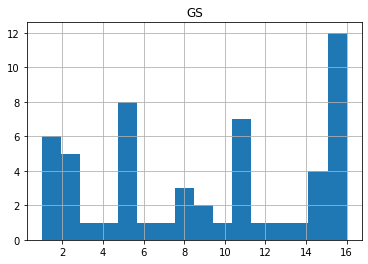

In [ ]:
gs = df['GS'].to_numpy()
mean = np.mean(gs)
std = np.std(gs)

Zscore = [np.round((x-mean)/std, 4) for x in gs]

hist = df.hist(column='GS', bins=16)

print('Mean: {}'.format(np.mean(gs)))
print('Meadian: {}'.format(np.median(gs)))
print('STD: {}'.format(np.std(gs)))
print('Var: {}'.format(np.var(gs)))

print('Z score: {}'.format(Zscore))

## **Win**

Mean: 4.509090909090909
Meadian: 4.0
STD: 3.8036954627774446
Var: 14.468099173553718
Z score: [1.4436, 0.392, 0.6549, 1.7065, 1.1807, 1.1807, 0.6549, 0.6549, 1.9694, 1.9694, 0.9178, 1.7065, 0.1291, -0.3967, 1.9694, 1.4436, 0.6549, 0.392, 0.6549, 0.9178, 1.4436, -0.1338, -0.1338, -0.6596, 0.6549, -0.9225, 0.6549, -0.1338, -0.1338, -0.9225, -0.1338, 0.1291, -0.3967, 0.6549, -0.6596, -1.1855, -0.9225, -0.6596, -0.9225, -0.6596, -0.3967, -0.6596, -0.9225, -1.1855, -0.9225, -1.1855, -0.9225, -1.1855, -1.1855, -0.9225, -0.9225, -1.1855, -1.1855, -1.1855, -1.1855]


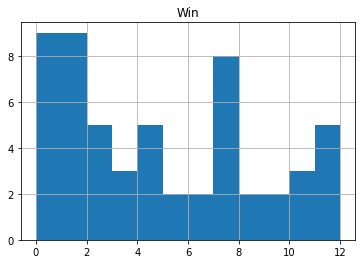

In [ ]:
win = df['Win'].to_numpy()
mean = np.mean(win)
std = np.std(win)

Zscore = [np.round((x-mean)/std, 4) for x in win]

hist = df.hist(column='Win', bins=12)

print('Mean: {}'.format(np.mean(win)))
print('Meadian: {}'.format(np.median(win)))
print('STD: {}'.format(np.std(win)))
print('Var: {}'.format(np.var(win)))

print('Z score: {}'.format(Zscore))

## **Loss**

Mean: 4.509090909090909
Meadian: 4.0
STD: 2.953412370140542
Var: 8.722644628099173
Z score: [0.5048, 1.8592, 1.182, 0.1662, 0.8434, 0.8434, 1.5206, 1.5206, -0.1724, -0.1724, -0.511, 0.1662, 2.1978, 2.1978, -0.511, 0.5048, -0.511, 0.5048, -0.1724, 0.8434, 0.1662, 1.5206, 0.8434, -0.511, -0.1724, 1.182, -0.1724, -0.8496, -1.1881, 1.182, 0.8434, -0.511, -0.8496, -1.1881, 0.1662, 0.1662, -0.1724, 1.5206, 0.8434, -0.511, -0.8496, -0.511, -0.8496, -0.1724, -1.5267, -1.1881, -1.5267, -0.8496, -0.8496, -1.1881, -1.5267, -0.8496, -0.8496, -1.1881, -1.1881]


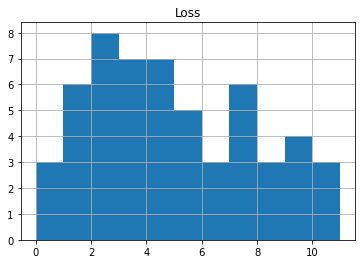

In [ ]:
loss = df['Loss'].to_numpy()
mean = np.mean(loss)
std = np.std(loss)

Zscore = [np.round((x-mean)/std, 4) for x in loss]

hist = df.hist(column='Loss', bins=11)

print('Mean: {}'.format(np.mean(loss)))
print('Meadian: {}'.format(np.median(loss)))
print('STD: {}'.format(np.std(loss)))
print('Var: {}'.format(np.var(loss)))

print('Z score: {}'.format(Zscore))

## **Tie**

<BarContainer object of 12 artists>

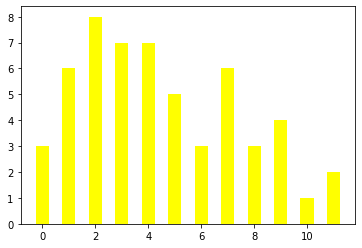

In [ ]:
#Can drop Tie
plt.bar([x for x in range(12)], y, color='yellow', width = 0.5)

## **Cmp**

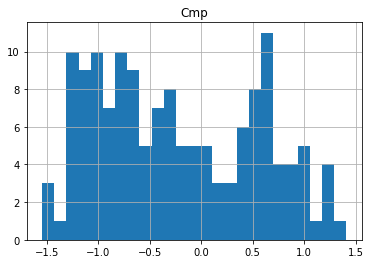

In [ ]:
hist = x.hist(column='Cmp', bins=25)


## **Att**

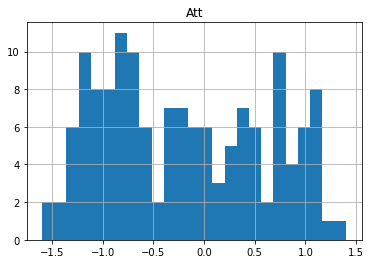

In [ ]:
hist = x.hist(column='Att', bins=25)


## **Cmp%**

Mean: 56.81454545454545
Meadian: 58.0
STD: 5.815353289723464
Var: 33.81833388429751
Z score: [0.9777, 1.1152, 0.479, 1.0121, 0.2554, -0.2089, 0.6853, 0.6681, 0.3414, 0.5478, 1.8718, 0.2038, 0.3414, -0.0025, 0.9949, -0.4152, 1.2872, 0.8917, 0.9777, -0.5528, 0.0491, 0.2038, 0.0663, 0.6165, 0.7025, -1.1718, -0.7935, 0.4618, 0.0491, -0.312, 0.4618, -0.3636, 0.2382, 0.4274, 1.184, 0.7025, 0.2382, -2.1692, -0.1917, -1.5845, 0.0835, -2.1004, 0.4102, -0.0885, -0.0885, -1.3266, 0.8057, 0.2038, -0.5356, 0.0835, 0.8745, -1.0171, -2.6335, -2.1864, -2.771]


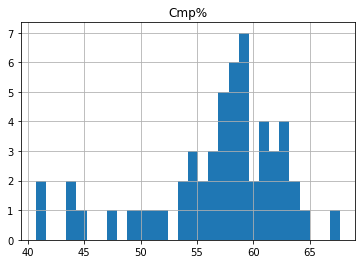

In [ ]:
df=getPassingData([2000])
cp = df['Cmp%'].to_numpy()
mean = np.mean(cp)
std = np.std(cp)

Zscore = [np.round((x-mean)/std, 4) for x in cp]

hist = df.hist(column='Cmp%', bins=30)

print('Mean: {}'.format(np.mean(cp)))
print('Meadian: {}'.format(np.median(cp)))
print('STD: {}'.format(np.std(cp)))
print('Var: {}'.format(np.var(cp)))

print('Z score: {}'.format(Zscore))

## **Yds**

Mean: 1971.7818181818182
Meadian: 1776.0
STD: 1247.0680770352237
Var: 1555178.7887603305
Z score: [1.9576, 1.8493, 1.7619, 1.5759, 1.4756, 1.4115, 1.4099, 1.3377, 1.3137, 1.1693, 1.1685, 1.1172, 1.0579, 0.7812, 0.7018, 0.6393, 0.5743, 0.5503, 0.4276, 0.4147, 0.345, 0.2119, 0.1229, 0.0731, 0.0427, -0.0712, -0.0896, -0.157, -0.2179, -0.2612, -0.2725, -0.3158, -0.3671, -0.3767, -0.3919, -0.4457, -0.4673, -0.5764, -0.7416, -0.8065, -0.8081, -0.8771, -0.9003, -1.1481, -1.1561, -1.1609, -1.1778, -1.2067, -1.2556, -1.2748, -1.3261, -1.3879, -1.3911, -1.4143, -1.4472]


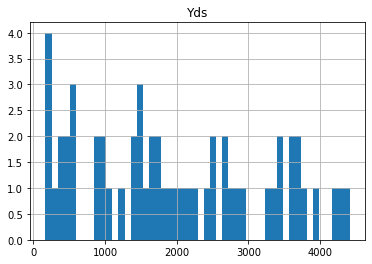

In [ ]:
yds = df['Yds'].to_numpy()
mean = np.mean(yds)
std = np.std(yds)

Zscore = [np.round((x-mean)/std, 4) for x in yds]

hist = df.hist(column='Yds', bins=50)

print('Mean: {}'.format(np.mean(yds)))
print('Meadian: {}'.format(np.median(yds)))
print('STD: {}'.format(np.std(yds)))
print('Var: {}'.format(np.var(yds)))

print('Z score: {}'.format(Zscore))

## **TD**

Mean: 11.345454545454546
Meadian: 10.0
STD: 9.035723408817976
Var: 81.64429752066115
Z score: [2.3965, 2.1752, 1.8432, 2.3965, 0.9578, 1.0685, 0.8471, 0.9578, 1.1792, 1.8432, 1.0685, 1.0685, 0.6258, 0.1831, 0.4045, 0.7365, 0.8471, 0.7365, -0.0382, 0.1831, 0.2938, -0.1489, 0.0724, 0.5151, 0.1831, -0.0382, -0.0382, -0.2596, -0.3702, -0.3702, -0.4809, -0.3702, -0.2596, 0.0724, -0.4809, -0.3702, -0.4809, -0.9236, -1.0343, -0.9236, -0.9236, -1.145, -0.5916, -0.9236, -1.0343, -1.0343, -1.145, -1.0343, -1.0343, -1.145, -1.145, -1.2556, -1.2556, -1.145, -1.2556]


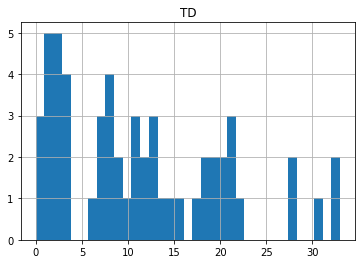

In [ ]:
td = df['TD'].to_numpy()
mean = np.mean(td)
std = np.std(td)

Zscore = [np.round((x-mean)/std, 4) for x in td]

hist = df.hist(column='TD', bins=35)

print('Mean: {}'.format(np.mean(td)))
print('Meadian: {}'.format(np.median(td)))
print('STD: {}'.format(np.std(td)))
print('Var: {}'.format(np.var(td)))

print('Z score: {}'.format(Zscore))

## **TD%**

Mean: 3.3709090909090906
Meadian: 3.4
STD: 1.6267840810264256
Var: 2.646426446280992
Z score: [1.4932, 1.3088, 1.0629, 2.2308, 0.0179, 0.1408, 0.1408, 0.3252, 0.5097, 1.5547, 1.6776, 0.2023, -0.1051, -0.4124, 0.2638, 0.5097, 1.4317, 0.5711, -0.228, -0.1051, 0.3252, -0.228, 0.3252, 2.0464, 0.5711, 0.0179, 0.2638, 0.3252, 0.0794, -0.2895, -0.4124, -0.2895, 0.7555, 1.1858, -0.0436, 0.3867, 0.1408, -1.3959, -1.4574, -1.0886, -1.0271, -1.6418, 0.8785, 0.0179, -0.1665, -1.0271, -1.3959, -0.2895, -0.228, -1.3345, -1.0886, -2.0721, -2.0721, -0.2895, -2.0721]


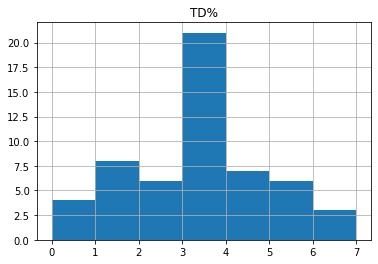

In [ ]:
tp = df['TD%'].to_numpy()
mean = np.mean(tp)
std = np.std(tp)

Zscore = [np.round((x-mean)/std, 4) for x in tp]

hist = df.hist(column='TD%', bins=7)

print('Mean: {}'.format(np.mean(tp)))
print('Meadian: {}'.format(np.median(tp)))
print('STD: {}'.format(np.std(tp)))
print('Var: {}'.format(np.var(tp)))

print('Z score: {}'.format(Zscore))

## Year

131
(388, 49)


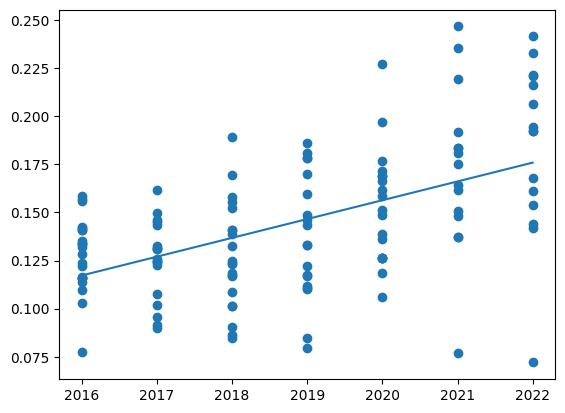

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('finalQB.csv')
df = df.rename(columns={'%Cap': 'PerCap'})
df0 = df[df.PerCap >= 0.07]
#define data
x = df0['Year'].to_numpy()
y = df0['PerCap'].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

print(len(y))
print(df.shape)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)     

214    0.065364
215    0.065364
216    0.065364
217    0.065364
218    0.065364
         ...   
383    0.058538
384    0.058538
385    0.058538
386    0.058538
387    0.058538
Length: 174, dtype: float64


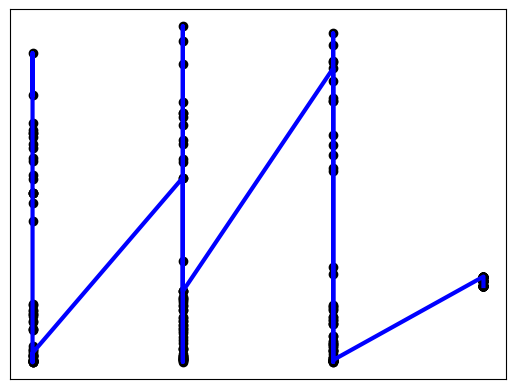

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#Load
df = pd.read_csv('finalQB.csv')
df = df.rename(columns={'%Cap': 'PerCap'})
df0 = df[df.PerCap >= 0.07]
df0 = df[df.Year >= 2020]

#define data
X = df0.loc[:, ['Year']]
y = df0.loc[:, 'PerCap']

from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
print(y_pred)
# Plot outputs
plt.scatter([x for x in X['Year']]+[2023 for X_test in range(len(y_pred))], [y for y in y]+[y for y in y_pred], color="black")
plt.plot([x for x in X['Year']]+[2023 for X_test in range(len(y_pred))], [y for y in y]+[y for y in y_pred], color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

131
(388, 49)


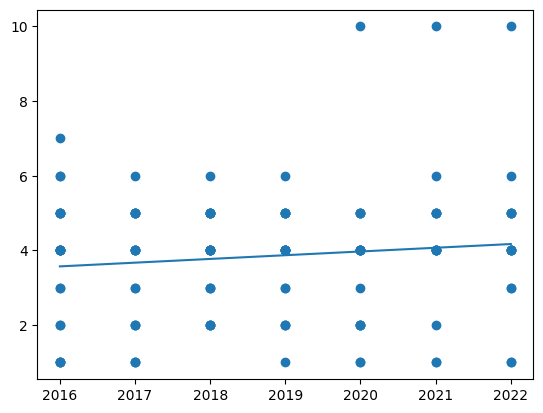

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load
df = pd.read_csv('finalQB.csv')
df = df.rename(columns={'%Cap': 'PerCap'})
df0 = df[df.PerCap >= 0.07]
#df0 = df[df.Year >= 2020]

#define data
X = df0.loc[:, ['Year']]
y = df0.loc[:, 'Con_Len']

#find line of best fit
a, b = np.polyfit(x, y, 1)

print(len(y))
print(df.shape)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)   

214    3.051392
215    3.051392
216    3.051392
217    3.051392
218    3.051392
         ...   
383    2.964115
384    2.964115
385    2.964115
386    2.964115
387    2.964115
Length: 174, dtype: float64


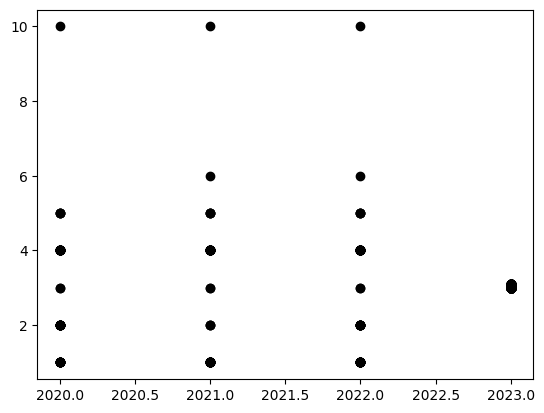

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#Load
df = pd.read_csv('finalQB.csv')
#df = df.rename(columns={'%Cap': 'PerCap'})
#df0 = df[df.PerCap >= 0.07]
#df0 = df[df.Year >= 2020]

#define data
X = df0.loc[:, ['Year']]
y = df0.loc[:, 'Con_Len']

from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
print(y_pred)
# Plot outputs
plt.scatter([x for x in X['Year']]+[2023 for X_test in range(len(y_pred))], [y for y in y]+[round(y, 1) for y in y_pred], color="black")
#find line of best fit
a, b = np.polyfit([x for x in X['Year']]+[2023 for X_test in range(len(y_pred))], [y for y in y]+[round(y, 1) for y in y_pred], 1)


plt.xticks(())
plt.yticks(())

plt.show()

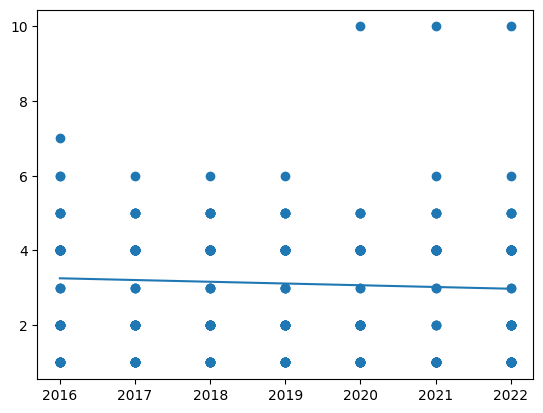

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('finalQB.csv')

#define data
x = df['Year'].to_numpy()
y = df['Con_Len'].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)    

## **Int**

## **Int%**

## **1D**

## **Lng**

## **Y/A**

## **AY/A**

## **Y/C**

## **Y/G**

## **New_Con_Len**

Mean: 0.36855670103092786
Meadian: 0.0
STD: 0.6265113515245488
Var: 0.3925164735891168
Z score: [-0.5883, -0.5883, 1.0079, -0.5883, -0.5883, 2.604, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, 2.604, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, 1.0079, -0.5883, 1.0079, 1.0079, -0.5883, 1.0079, 1.0079, 2.604, -0.5883, 1.0079, -0.5883, 1.0079, 1.0079, 1.0079, -0.5883, -0.5883, 1.0079, -0.5883, -0.5883, -0.5883, 1.0079, 1.0079, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, 1.0079, -0.5883, -0.5883, -0.5883, -0.5883, 1.0079, -0.5883, 2.604, 2.604, 2.604, -0.5883, -0.5883, 2.604, 1.0079, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, 1.0079, 1.0079, -0.5883, -0.5883, -0.5883, 1.0079, -0.5883, -0.5883, -0.5883, -0.5883, 2.604, 2.604, -0.5883, -0.5883, 2.604, 1.0079, 1.0079, 1.0079, -0.5883, 1.0079, 1.0079, -0.5883, 1.0079, -0.5883, -0.5883, -0.5883, -0.5883, -0.5883, 1.0079, -0.5883, 1.0079, 1.007

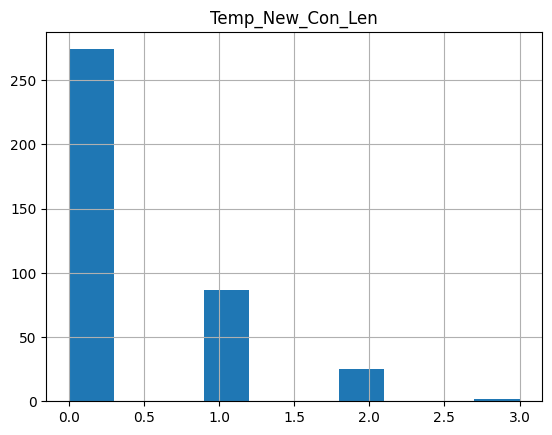

In [ ]:
ncl = df['Temp_New_Con_Len'].to_numpy()
mean = np.mean(ncl)
std = np.std(ncl)

Zscore = [np.round((x-mean)/std, 4) for x in ncl]

hist = df.hist(column='Temp_New_Con_Len', bins=10)
#plt.hist(Zscore, 16)

count = {}
for z in Zscore:
  if z in count:
    count[z] += 1
  else:
    count[z] = 1
print('Mean: {}'.format(np.mean(ncl)))
print('Meadian: {}'.format(np.median(ncl)))
print('STD: {}'.format(np.std(ncl)))
print('Var: {}'.format(np.var(ncl)))

print('Z score: {}'.format(Zscore))
print('Z count: {}'.format(count))

In [ ]:
df = pd.read_csv('/content/finalQB.csv')

Mean: 0.0034374608150470223
Meadian: 0.0
STD: 0.0340216088138085
Var: 0.0011574698662798122
Z score: [-0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, 2.3327, -0.1069, -0.1069, -0.1099, -0.1069, -0.101, -0.101, -0.1069, -0.104, -0.1069, 1.7243, -0.1099, -0.104, -0.104, -0.1069, -0.101, -0.1069, 1.6243, -0.101, -0.101, -0.1069, -0.101, -0.101, -0.1069, -0.101, 0.722, -0.1069, -0.101, 0.5309, -0.101, -0.1069, 0.9601, -0.101, -0.101, -0.104, -0.1069, -0.101, -0.101, -0.101, -0.101, -0.101, -0.101, -0.3715, -0.101, -0.101, -0.101, -0.2157, -0.2186, 1.1746, 2.0917, -0.1922, -1.2385, -0.1099, -0.8182, -0.1892, -0.11

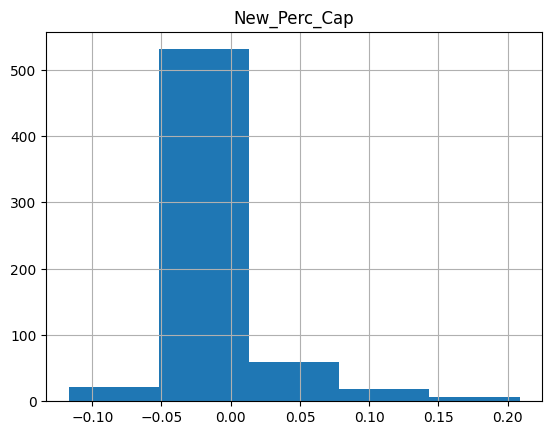

In [ ]:
ncl = df['New_Perc_Cap'].to_numpy().round(4)
mean = np.mean(ncl)
std = np.std(ncl)

Zscore = [np.round((x-mean)/std, 4) for x in ncl]

hist = df.hist(column='New_Perc_Cap', bins=5)
#plt.hist(Zscore, 16)

count = {}
for z in Zscore:
  if z in count:
    count[z] += 1
  else:
    count[z] = 1
print('Mean: {}'.format(np.mean(ncl)))
print('Meadian: {}'.format(np.median(ncl)))
print('STD: {}'.format(np.std(ncl)))
print('Var: {}'.format(np.var(ncl)))

print('Z score: {}'.format(Zscore))
print('Z count: {}'.format(count))

In [ ]:
df = final#pd.read_csv('/content/finalQB.csv')

In [ ]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df['New_Con'] = 't'
for yr in years:
  findex = df[df.Year == yr].index
  for i in range(len(findex)):
   if df.loc[findex[i], 'New_Con_Len'] != 0:
    if df.loc[findex[i], 'New_Con_Len'] <= 2:
      df.at[findex[i], 'New_Con'] = ('Prove It', df.loc[findex[i], 'New_Con_Len'])
      df.at[findex[i], 'New_Con_Len'] = 1
    elif df.loc[findex[i], 'New_Con_Len'] <= 5:
      df.at[findex[i], 'New_Con'] = ('Standard', df.loc[findex[i], 'New_Con_Len'])
      df.at[findex[i], 'New_Con_Len'] = 2
    else:
      df.at[findex[i], 'New_Con'] = ('Franchise', df.loc[findex[i], 'New_Con_Len'])
      df.at[findex[i], 'New_Con_Len'] = 3
   else:
     df.at[findex[i], 'New_Con'] = ('None', df.loc[findex[i], 'New_Con_Len'])

In [ ]:
df.columns

Index(['Player', 'Tm', 'Pos', 'Rk', 'Age', 'G', 'GS', 'Tgt', 'Rec', 'Ctch%',
       'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Fmb', 'Year',
       'Rookie', 'Vet', 'Con_Len', 'Con_Sal', 'Cap', '%Cap', 'New_Con_Len',
       'New_Perc_Cap', 'Con_Yrs_Lft', 'New_Con'],
      dtype='object')

In [ ]:
#df = df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df['New_Perc_Cap'] = df['New_Perc_Cap'].map(lambda x: round(x, 4))

In [ ]:
df.to_csv('TEdf1.csv', index=False)

In [ ]:
df[df.Player == 'Dallas Goedert']

,Player,Tm,Pos,Rk,Age,G,GS,Tgt,Rec,Ctch%,...,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap,Con_Yrs_Lft,New_Con
630,Dallas Goedert,PHI,TE,-0.927548,-1.060746,0.769417,0.288973,0.386255,0.521051,0.438078,...,1.0,0.0,4.0,5624271.0,177200000.0,0.007935,0,0.0075,3,"(None, 0)"
715,Dallas Goedert,PHI,TE,-1.367293,-0.740724,0.670802,0.439283,1.667809,1.551522,0.032770,...,1.0,0.0,4.0,5624271.0,188200000.0,0.007471,0,0.0071,2,"(None, 0)"
815,Dallas Goedert,PHI,TE,-1.067821,-0.599277,-0.544812,0.384133,0.911479,1.003812,0.294808,...,1.0,0.0,4.0,5624271.0,198200000.0,0.007094,2,0.0781,1,"(Standard, 4)"
910,Dallas Goedert,PHI,TE,-1.338148,-0.244729,0.379943,1.315898,1.179237,1.343916,0.254603,...,0.0,1.0,4.0,57000000.0,182500000.0,0.078082,0,0.0684,3,"(None, 0)"
1002,Dallas Goedert,PHI,TE,-1.219155,0.243941,-0.548741,0.805544,1.027544,1.363097,0.610674,...,0.0,1.0,4.0,57000000.0,208200000.0,0.068444,0,0.0000,2,"(None, 0)"


In [ ]:
df = df.loc[~((df['Rookie'] == 1.0) & (df['Con_Len'] > 4.0))]

In [ ]:
rookies = df[df.Rookie == 1]

In [ ]:
feeder = pd.read_csv('/Zfeeder.csv')

In [ ]:
#rookies.groupby('Player').head()
rookies2 = rookies.sort_values(by=['Player', 'Year'], ignore_index=True)
rookies2.head()

,Player,Tm,Pos,Rk,Age,G,GS,Cmp,Att,Cmp%,...,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap,Con_Yrs_Lft,New_Con
0,Bailey Zappe,NWE,QB,0.311028,-1.078925,-0.895616,-0.984028,-0.729626,-0.801408,1.431802,...,1,0,4,4307072,208200000,0.005172,0,0.0000,3,"(None, 0)"
1,Baker Mayfield,CLE,QB,-0.691143,-1.133760,0.672110,0.631240,0.734430,0.809131,0.148360,...,1,0,4,32682980,177200000,0.046110,0,0.0434,3,"(None, 0)"
2,Baker Mayfield,CLE,QB,-0.870977,-0.850713,1.142869,1.189770,0.882930,1.065248,-0.474251,...,1,0,4,32682980,188200000,0.043415,0,0.0412,2,"(None, 0)"
3,Baker Mayfield,CLE,QB,-0.666403,-0.701953,1.159373,1.193740,0.750705,0.870539,-0.123545,...,1,0,4,32682980,198200000,0.041225,0,0.0448,1,"(None, 0)"
4,Baker Mayfield,CLE,QB,-0.421984,-0.494996,0.702306,0.802532,0.395046,0.532939,-0.490880,...,1,0,4,32682980,182500000,0.044771,0,0.0000,0,"(None, 0)"


In [ ]:
unique_players = set(rookies2['Player'].tolist())

In [ ]:
temp = feeder[feeder['Player'].isin(unique_players)]
finalTest = temp[temp.ConLen == 0]
temp2 = temp[~temp['Player'].isin(finalTest['Player'].tolist())]

In [ ]:
temp2 = temp2.drop(['Tie', 'ConSal', 'FTag', 'PPY', '%Cap', 'Year', 'ConLenR', 'ConSalR', 'ConLen'], axis=1)

KeyError: ignored

In [ ]:
temp2

,Player,Rk,Tm,Age,Pos,G,GS,Win,Loss,Cmp,...,4QC,GWD,Att_R,Yds_R,TD_R,1D_R,Lng_R,Y/A_R,Y/G_R,Fmb_R
8,Ben DiNucci,1.508948,DAL,-0.888921,QB,-1.295185,-1.326378,-1.040080,-1.026164,-1.293828,...,-0.853015,-0.880631,-0.629615,-0.501579,-0.619271,-0.572568,-0.419617,-0.047515,-0.338525,0.233991
11,Blake Bortles,-0.851289,JAX,-1.196917,QB,1.004455,0.985454,0.129677,1.654459,0.917866,...,0.329078,0.248543,1.270615,1.757738,0.504372,1.626571,1.135305,1.316601,1.360582,1.486282
15,Brett Hundley,0.082821,GNB,-0.998838,QB,0.196689,-0.023828,-0.381988,0.426014,0.000563,...,1.223551,0.484664,0.461541,1.101022,0.644503,1.329579,0.605514,1.171294,1.399228,0.010846
22,C.J. Beathard,0.493346,SFO,-0.688650,QB,-0.711502,-0.871284,-0.947188,-0.357972,-0.756342,...,-0.889972,-0.966457,-0.278419,-0.185777,0.208376,-0.208149,-0.038330,0.304833,0.170354,-0.032531
25,Carson Wentz,-0.697249,PHI,-0.675484,QB,0.713882,0.794032,0.827543,0.457181,0.907951,...,0.317661,0.355980,0.972226,0.574927,-0.167421,1.024986,0.321404,0.236635,0.410730,1.917127
32,Cody Kessler,0.531741,JAX,-1.023649,QB,-0.669617,-0.589998,-0.907573,0.080962,-0.714705,...,-0.834770,-0.893825,-0.397161,-0.260667,-0.628467,-0.346022,0.011162,0.465448,0.322231,0.082891
38,Dak Prescott,-0.917826,DAL,-0.880601,QB,1.092228,1.137208,1.329774,0.457092,1.014306,...,0.374489,1.250961,1.301052,1.303838,2.578373,1.550895,1.131645,0.758338,0.850443,0.914301
43,DeShone Kizer,-0.283335,CLE,-1.627320,QB,0.930992,0.976952,-1.111238,3.109905,0.496822,...,-0.917663,-1.066261,2.023384,2.084994,2.497451,2.433682,0.331992,0.588262,1.713051,1.258098
46,Derek Carr,-0.802690,OAK,-0.973150,QB,1.008600,1.033070,0.567507,1.197986,1.031236,...,1.400863,1.053886,0.296460,-0.037799,-0.580619,0.004641,0.939936,0.116262,-0.243891,1.155638
47,Deshaun Watson,-0.865158,HOU,-1.026063,QB,0.659183,0.711095,0.615599,0.521617,0.693442,...,0.619064,0.630497,1.692885,1.809541,1.690475,1.624267,1.323963,0.790785,1.739617,0.910496


In [ ]:
unique_players = set(temp2['Player'].tolist())
temp3 = df[df['Player'].isin(unique_players)].sort_values(by=['Player', 'Year'], ignore_index=True)
unique_players = set(temp3['Player'].tolist())
for player in unique_players:
  findex = temp3[temp3.Player == player].index
  for i in range(len(findex)):
    if i != len(findex)-1:
      temp3 = temp3.drop(index=findex[i])

In [ ]:
temp3

,Player,Tm,Pos,Rk,Age,G,GS,Cmp,Att,Cmp%,...,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap,Con_Yrs_Lft,New_Con
0,Ben DiNucci,DAL,QB,1.508948,-0.888921,-1.295185,-1.326378,-1.293828,-1.298379,-1.884059,...,1,0,4,3390148,198200000,0.004276,0,0.0,3,"(None, 0)"
3,Blake Bortles,JAX,QB,-0.257065,-0.541765,0.479578,0.456777,0.258207,0.409295,-0.459284,...,0,1,3,54000000,177200000,0.101580,0,0.0,2,"(None, 0)"
4,Brett Hundley,GNB,QB,0.082821,-0.998838,0.196689,-0.023828,0.000563,0.036139,-0.057108,...,1,0,4,2503633,167000000,0.003748,0,0.0,1,"(None, 0)"
7,C.J. Beathard,SFO,QB,0.728053,-0.328015,-0.728749,-1.158370,-0.982073,-0.999724,0.008967,...,1,0,4,3528646,198200000,0.004451,0,0.0,1,"(None, 0)"
14,Carson Wentz,WAS,QB,-0.170747,0.427140,-0.157411,-0.145508,0.042108,0.085172,-0.050070,...,0,1,4,128000000,208200000,0.153698,0,0.0,0,"(None, 0)"
16,Cody Kessler,JAX,QB,0.735115,-0.739097,-1.060673,-0.938931,-0.864826,-0.901010,0.339334,...,1,0,4,3389082,177200000,0.004781,0,0.0,2,"(None, 0)"
23,Dak Prescott,DAL,QB,-0.748876,0.211988,0.580793,0.693012,0.684018,0.653739,0.637942,...,0,1,4,160000000,208200000,0.192123,0,0.0,2,"(None, 0)"
24,DeShone Kizer,CLE,QB,-0.283335,-1.627320,0.930992,0.976952,0.496822,0.849731,-1.244016,...,1,0,4,4948416,167000000,0.007408,0,0.0,3,"(None, 0)"
31,Derek Carr,LVR,QB,-1.037941,0.642293,1.134446,1.196124,1.001366,1.174123,-0.314690,...,0,1,3,121500000,208200000,0.194524,0,0.0,2,"(None, 0)"
36,Deshaun Watson,CLE,QB,0.118318,-0.218316,-0.526513,-0.313212,-0.484402,-0.425575,-0.773365,...,0,1,5,230000000,208200000,0.220941,0,0.0,4,"(None, 0)"


In [ ]:
temp3.merge(temp2, how='left', left_on=temp2.columns.tolist(), right_on=temp2.columns.tolist())

,Player,Tm,Pos,Rk,Age,G,GS,Cmp,Att,Cmp%,...,Rookie,Vet,Con_Len,Con_Sal,Cap,%Cap,New_Con_Len,New_Perc_Cap,Con_Yrs_Lft,New_Con
0,Ben DiNucci,DAL,QB,1.508948,-0.888921,-1.295185,-1.326378,-1.293828,-1.298379,-1.884059,...,1,0,4,3390148,198200000,0.004276,0,0.0,3,"(None, 0)"
1,Blake Bortles,JAX,QB,-0.257065,-0.541765,0.479578,0.456777,0.258207,0.409295,-0.459284,...,0,1,3,54000000,177200000,0.101580,0,0.0,2,"(None, 0)"
2,Brett Hundley,GNB,QB,0.082821,-0.998838,0.196689,-0.023828,0.000563,0.036139,-0.057108,...,1,0,4,2503633,167000000,0.003748,0,0.0,1,"(None, 0)"
3,C.J. Beathard,SFO,QB,0.728053,-0.328015,-0.728749,-1.158370,-0.982073,-0.999724,0.008967,...,1,0,4,3528646,198200000,0.004451,0,0.0,1,"(None, 0)"
4,Carson Wentz,WAS,QB,-0.170747,0.427140,-0.157411,-0.145508,0.042108,0.085172,-0.050070,...,0,1,4,128000000,208200000,0.153698,0,0.0,0,"(None, 0)"
5,Cody Kessler,JAX,QB,0.735115,-0.739097,-1.060673,-0.938931,-0.864826,-0.901010,0.339334,...,1,0,4,3389082,177200000,0.004781,0,0.0,2,"(None, 0)"
6,Dak Prescott,DAL,QB,-0.748876,0.211988,0.580793,0.693012,0.684018,0.653739,0.637942,...,0,1,4,160000000,208200000,0.192123,0,0.0,2,"(None, 0)"
7,DeShone Kizer,CLE,QB,-0.283335,-1.627320,0.930992,0.976952,0.496822,0.849731,-1.244016,...,1,0,4,4948416,167000000,0.007408,0,0.0,3,"(None, 0)"
8,Derek Carr,LVR,QB,-1.037941,0.642293,1.134446,1.196124,1.001366,1.174123,-0.314690,...,0,1,3,121500000,208200000,0.194524,0,0.0,2,"(None, 0)"
9,Deshaun Watson,CLE,QB,0.118318,-0.218316,-0.526513,-0.313212,-0.484402,-0.425575,-0.773365,...,0,1,5,230000000,208200000,0.220941,0,0.0,4,"(None, 0)"


In [ ]:
df.to_csv('RBdf.csv', index=False)